In [1]:
# Third-party packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from matplotlib.ticker import FormatStrFormatter
from calendar import monthrange
import re
import matplotlib.colors as colors
import matplotlib.cm as cmx

import geopandas as gpd
from shapely.geometry import Point, Polygon

from scipy.spatial import distance
%matplotlib inline

pd.options.display.float_format = '{:,.2f}'.format

In [11]:
def closest_node(x, y, nodes):
    node=[x,y]
    closest_index = distance.cdist([node], nodes).argmin()
    return nodes[closest_index]

def dms_to_dd(lat):
    deg, minutes, seconds, direction =  re.split('[°\'"]', lat)
    return (float(deg) + float(minutes)/60 + float(seconds)/(60*60)) * (-1 if direction in [' W', ' S'] else 1)

In [3]:
path='/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/V2 Work/electric_substations.csv'
substation=pd.read_csv(path)
substation.drop(columns=['type', 'properties/Interval', 'properties/Price Level', 'properties/LMP', 'properties/Congestion', 'properties/Energy','properties/Losses', 'properties/node_ba', 'geometry/type', 'geometry/coordinates/0', 'geometry/coordinates/1'], inplace=True)
substation.loc[:,'type']='electrical substation'
nsubs=len(substation['node'].unique())
substation.loc[:,'es_id']=range(0,nsubs)
substation.rename(columns={'latitude':'lat', 'longitude':'lon'}, inplace=True)
es=substation['node'].unique()
substation

,node,lat,lon,type,es_id
0,106THSO_LNODED1,40.56,-111.90,electrical substation,0
1,118THSO_LNODER1,40.54,-111.90,electrical substation,1
2,13THSO_LNODED2,40.74,-111.89,electrical substation,2
3,23RDST_LNODED3,41.23,-111.97,electrical substation,3
4,26FTDROP_GNODEIT,39.48,-118.90,electrical substation,4
...,...,...,...,...,...
6036,ZANKER_1_N001,37.47,-121.81,electrical substation,6036
6037,ZANKER_1_N003,37.47,-121.81,electrical substation,6037
6038,ZEN_LNODEXF2,47.39,-122.31,electrical substation,6038
6039,ZLOG_LNODE132,43.60,-116.54,electrical substation,6039


In [13]:
path = '/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/V2 Work/inputs/sites_of_interest_raw.csv'
sites_of_interest=pd.read_csv(path, usecols=['name', 'lat', 'lon', 'state'])
sites_of_interest.loc[:,'lat']=sites_of_interest.apply(lambda x: dms_to_dd(x['lat']), axis=1)
sites_of_interest.loc[:, 'lon']=sites_of_interest.apply(lambda x: dms_to_dd(x['lon']), axis=1)
sites_of_interest.loc[:,'type']="industry interest"
sites_of_interest.drop(columns=['Latitude', 'Longitude'], inplace=True)
sites_of_interest.columns= sites_of_interest.columns.str.lower()
sites_of_interest

TypeError: expected string or bytes-like object

In [51]:
sites_of_interest.loc[:,'es_coordinate']=sites_of_interest.apply(lambda x: closest_node(x['lon'],x['lat'],substation[["lon", "lat"]].values.tolist()), axis=1)
sites_of_interest.loc[:,'es_lon']=sites_of_interest.loc[:,'es_coordinate'].str[0]
sites_of_interest.loc[:,'es_lat']=sites_of_interest.loc[:,'es_coordinate'].str[1]
sites_of_interest.loc[:,'es_id']=sites_of_interest.apply(lambda x: (substation.loc[(substation['lon']==x['es_lon']) & (substation['lat']==x['es_lat'])]['es_id'].reset_index())['es_id'][0], axis=1)
sites_of_interest.drop(columns='es_coordinate', inplace=True)
sites_of_interest

,name,state,lat,lon,type,es_lon,es_lat,es_id
0,Neah Bay 1,WA,48.28,-124.77,industry interest,-122.69,48.21,1186
1,Neah Bay 2,WA,48.19,-125.07,industry interest,-123.01,47.09,2268
2,La Push 1,WA,48.04,-124.92,industry interest,-123.01,47.09,2268
3,La Push 2,WA,47.92,-124.70,industry interest,-123.01,47.09,2268
4,La Push 3,WA,47.82,-124.58,industry interest,-123.01,47.09,2268
...,...,...,...,...,...,...,...,...
95,Lompoc 8,CA,34.08,-120.46,industry interest,-120.43,34.53,3249
96,Port Hueneme 1,CA,34.07,-119.19,industry interest,-119.17,34.13,3941
97,Torrance,CA,33.53,-118.87,industry interest,-118.39,33.85,4413
98,Port Hueneme 2,CA,33.28,-119.61,industry interest,-119.17,34.13,3941


In [52]:
sites_of_interest_nearest_es=sites_of_interest.copy()
sites_of_interest_nearest_es

,name,state,lat,lon,type,es_lon,es_lat,es_id
0,Neah Bay 1,WA,48.28,-124.77,industry interest,-122.69,48.21,1186
1,Neah Bay 2,WA,48.19,-125.07,industry interest,-123.01,47.09,2268
2,La Push 1,WA,48.04,-124.92,industry interest,-123.01,47.09,2268
3,La Push 2,WA,47.92,-124.70,industry interest,-123.01,47.09,2268
4,La Push 3,WA,47.82,-124.58,industry interest,-123.01,47.09,2268
...,...,...,...,...,...,...,...,...
95,Lompoc 8,CA,34.08,-120.46,industry interest,-120.43,34.53,3249
96,Port Hueneme 1,CA,34.07,-119.19,industry interest,-119.17,34.13,3941
97,Torrance,CA,33.53,-118.87,industry interest,-118.39,33.85,4413
98,Port Hueneme 2,CA,33.28,-119.61,industry interest,-119.17,34.13,3941


In [53]:
geo_sites_of_interest= gpd.GeoDataFrame(sites_of_interest, geometry=gpd.points_from_xy(sites_of_interest.lon, sites_of_interest.lat))
geo_substation= gpd.GeoDataFrame(substation, geometry=gpd.points_from_xy(substation.lon, substation.lat))
geo_sites_of_interest_nearest_es=gpd.GeoDataFrame(sites_of_interest_nearest_es, geometry=gpd.points_from_xy(sites_of_interest_nearest_es.es_lon, sites_of_interest_nearest_es.es_lat))

In [54]:
geo_sites_of_interest_nearest_es

,name,state,lat,lon,type,es_lon,es_lat,es_id,geometry
0,Neah Bay 1,WA,48.28,-124.77,industry interest,-122.69,48.21,1186,POINT (-122.69250 48.21194)
1,Neah Bay 2,WA,48.19,-125.07,industry interest,-123.01,47.09,2268,POINT (-123.01194 47.09111)
2,La Push 1,WA,48.04,-124.92,industry interest,-123.01,47.09,2268,POINT (-123.01194 47.09111)
3,La Push 2,WA,47.92,-124.70,industry interest,-123.01,47.09,2268,POINT (-123.01194 47.09111)
4,La Push 3,WA,47.82,-124.58,industry interest,-123.01,47.09,2268,POINT (-123.01194 47.09111)
...,...,...,...,...,...,...,...,...,...
95,Lompoc 8,CA,34.08,-120.46,industry interest,-120.43,34.53,3249,POINT (-120.43000 34.53000)
96,Port Hueneme 1,CA,34.07,-119.19,industry interest,-119.17,34.13,3941,POINT (-119.16899 34.12972)
97,Torrance,CA,33.53,-118.87,industry interest,-118.39,33.85,4413,POINT (-118.39389 33.85265)
98,Port Hueneme 2,CA,33.28,-119.61,industry interest,-119.17,34.13,3941,POINT (-119.16899 34.12972)


In [55]:
geo_sites_of_interest

,name,state,lat,lon,type,es_lon,es_lat,es_id,geometry
0,Neah Bay 1,WA,48.28,-124.77,industry interest,-122.69,48.21,1186,POINT (-124.76722 48.27611)
1,Neah Bay 2,WA,48.19,-125.07,industry interest,-123.01,47.09,2268,POINT (-125.07278 48.18833)
2,La Push 1,WA,48.04,-124.92,industry interest,-123.01,47.09,2268,POINT (-124.92306 48.03528)
3,La Push 2,WA,47.92,-124.70,industry interest,-123.01,47.09,2268,POINT (-124.70278 47.92250)
4,La Push 3,WA,47.82,-124.58,industry interest,-123.01,47.09,2268,POINT (-124.57694 47.82056)
...,...,...,...,...,...,...,...,...,...
95,Lompoc 8,CA,34.08,-120.46,industry interest,-120.43,34.53,3249,POINT (-120.45861 34.07639)
96,Port Hueneme 1,CA,34.07,-119.19,industry interest,-119.17,34.13,3941,POINT (-119.18583 34.07056)
97,Torrance,CA,33.53,-118.87,industry interest,-118.39,33.85,4413,POINT (-118.87250 33.52722)
98,Port Hueneme 2,CA,33.28,-119.61,industry interest,-119.17,34.13,3941,POINT (-119.61306 33.28333)


In [11]:
wecc = gpd.read_file('load_zones/wecc_load_areas.shp')
wecc ['coords'] = wecc ['geometry'].apply(lambda x: x.representative_point().coords[:])
wecc ['coords'] = [coords[0] for coords in wecc['coords']]

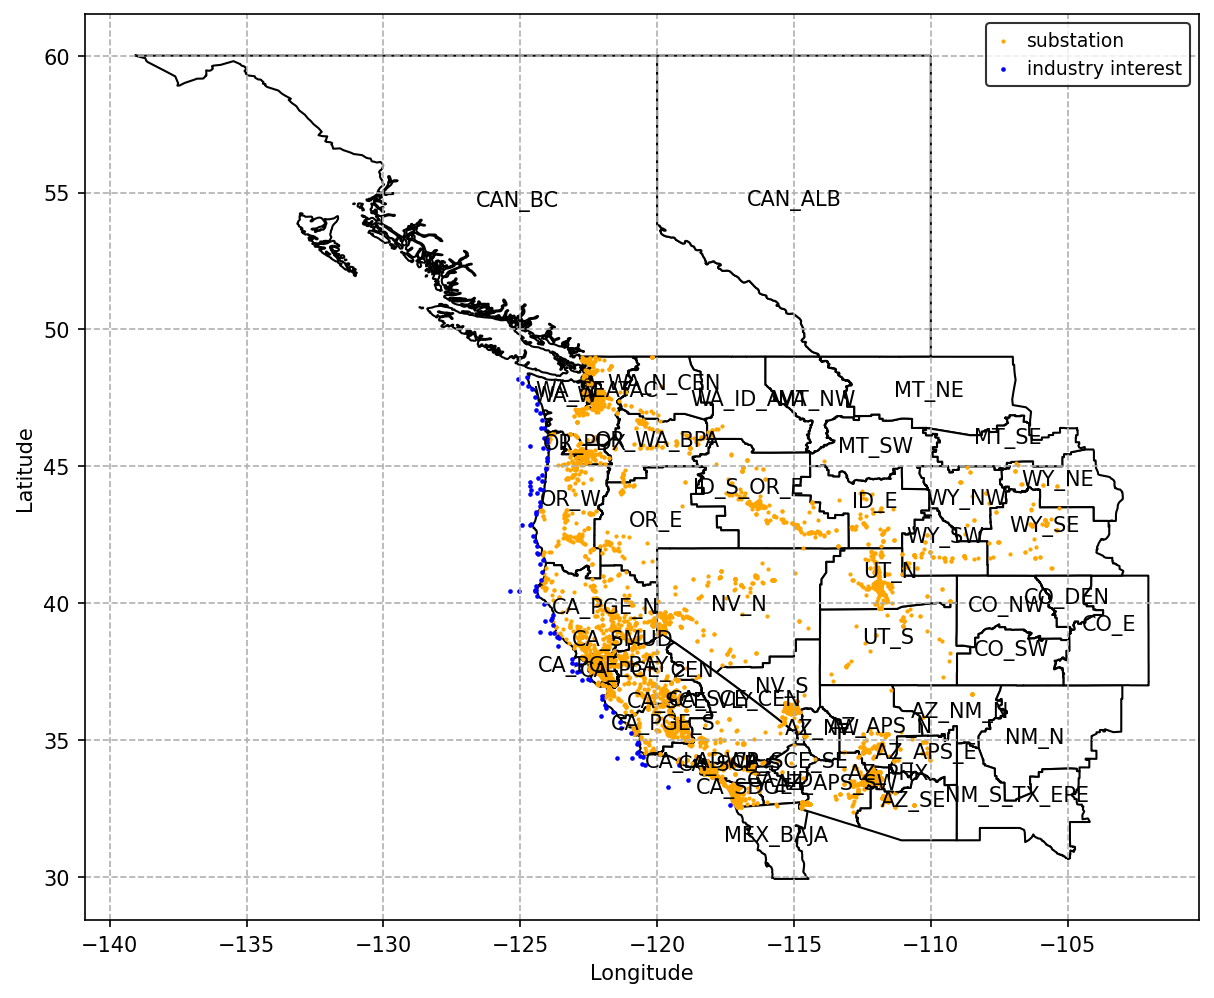

In [15]:
# Plot
fig = plt.figure(figsize=(11,8), dpi=150)

fig.patch.set_facecolor('white')

ax=fig.add_subplot(111)

ax=wecc.plot(ax=ax, color='white', edgecolor='black', linewidth=1)

ax=geo_substation.plot(ax=ax, color='orange', markersize=1, label='substation')

ax=geo_sites_of_interest.plot(ax=ax, color='blue', markersize=1.5, label='industry interest')

# Label configuration
ax.set_ylabel("Latitude")
ax.set_xlabel("Longitude")

ax.grid(axis='y', linestyle='dashed')
ax.grid(axis='x', linestyle='dashed')
 
#handles, labels = ax.get_legend_handles_labels()
ax.legend(
   # handles[::-1],
   # labels[::-1],
   # bbox_to_anchor=(1, 1),
    loc="upper right",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)


for idx, row in wecc.iterrows():
   ax=plt.annotate(text=row['LOAD_AREA'], xy=row['coords'], horizontalalignment='center')


In [19]:
closests=sites_of_interest[['es_lon', 'es_lat']].rename(columns={'es_lon':'lon', 'es_lat':'lat'})
closests.loc[:,'type']='nearest electrical substation'
df_plot=pd.concat([sites_of_interest[["lat", "lon", "type"]],closests])
geo_df_plot= gpd.GeoDataFrame(df_plot, geometry=gpd.points_from_xy(df_plot.lon, df_plot.lat))
geo_df_plot

,lat,lon,type,geometry
0,48.28,-124.77,industry interest,POINT (-124.76722 48.27611)
1,48.19,-125.07,industry interest,POINT (-125.07278 48.18833)
2,48.04,-124.92,industry interest,POINT (-124.92306 48.03528)
3,47.92,-124.70,industry interest,POINT (-124.70278 47.92250)
4,47.82,-124.58,industry interest,POINT (-124.57694 47.82056)
...,...,...,...,...
95,34.53,-120.43,nearest electrical substation,POINT (-120.43000 34.53000)
96,34.13,-119.17,nearest electrical substation,POINT (-119.16899 34.12972)
97,33.85,-118.39,nearest electrical substation,POINT (-118.39389 33.85265)
98,34.13,-119.17,nearest electrical substation,POINT (-119.16899 34.12972)


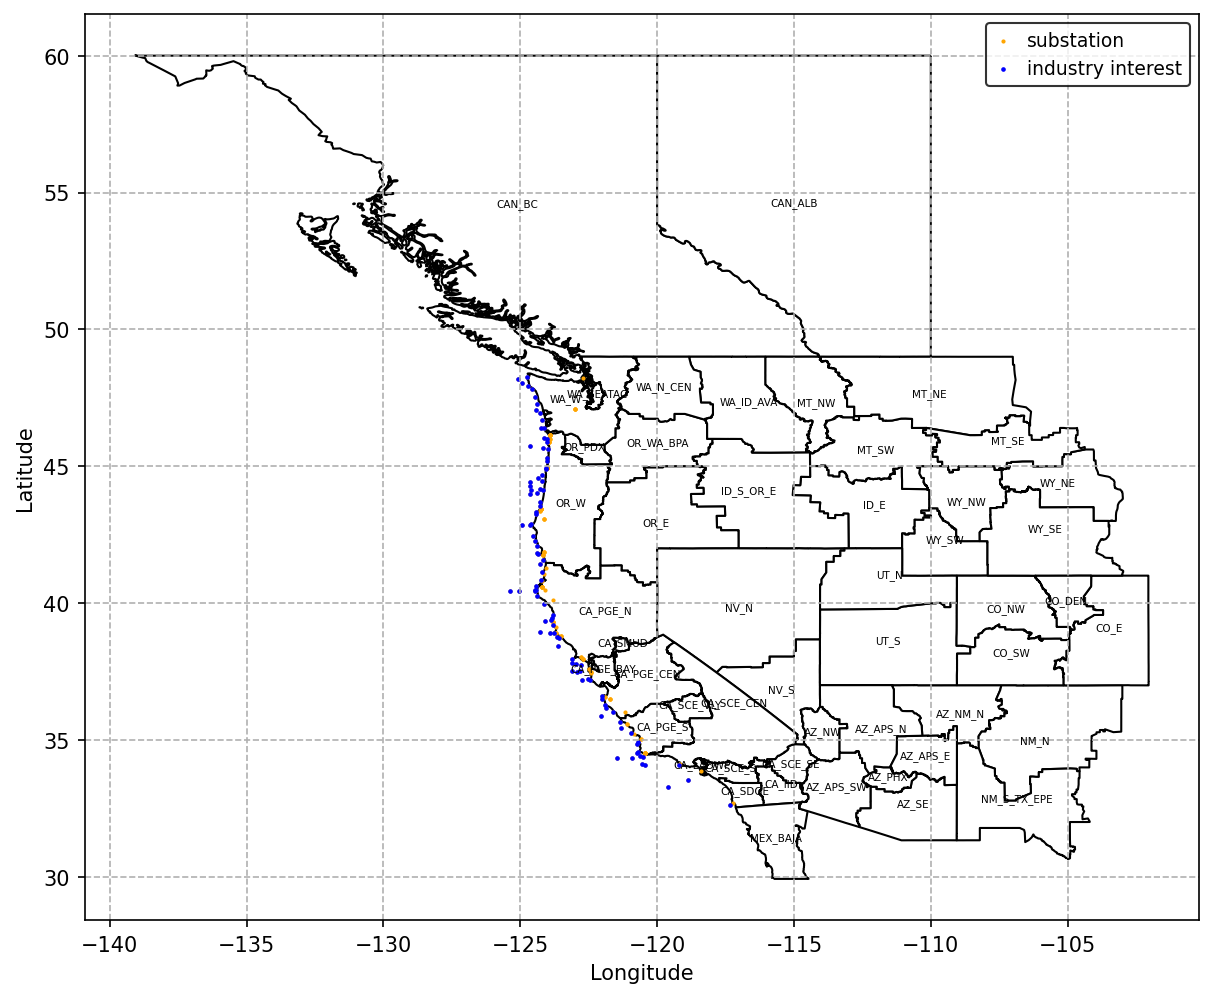

In [23]:
# Plot
fig = plt.figure(figsize=(11,8), dpi=150)

fig.patch.set_facecolor('white')

ax=fig.add_subplot(111)

ax=wecc.plot(ax=ax, color='white', edgecolor='black', linewidth=1)

ax=geo_df_plot.plot(ax=ax, color='orange', markersize=1, label='substation')

ax=geo_sites_of_interest.plot(ax=ax, color='blue', markersize=1.5, label='industry interest')

# Label configuration
ax.set_ylabel("Latitude")
ax.set_xlabel("Longitude")

ax.grid(axis='y', linestyle='dashed')
ax.grid(axis='x', linestyle='dashed')
 
#handles, labels = ax.get_legend_handles_labels()
ax.legend(
   # handles[::-1],
   # labels[::-1],
   # bbox_to_anchor=(1, 1),
    loc="upper right",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)


for idx, row in wecc.iterrows():
   ax=plt.annotate(text=row['LOAD_AREA'], xy=row['coords'], horizontalalignment='center', fontsize=5)


In [39]:
west_zones=list(wecc[wecc.PRIMARY_ST=='CA']['LOAD_AREA'])+list(wecc[wecc.PRIMARY_ST=='OR']['LOAD_AREA'])+list(wecc[wecc.PRIMARY_ST=='WA']['LOAD_AREA'])

In [40]:
def localize(x):
   for z in west_zones:
     if (x.within(wecc[wecc.LOAD_AREA==z]['geometry'].reset_index()['geometry'][0])==1):
        return z

In [56]:
geo_sites_of_interest_nearest_es.loc[:,'load_zone']=geo_sites_of_interest_nearest_es.apply(lambda x: localize(x['geometry']), axis=1)

In [57]:
geo_sites_of_interest_nearest_es

,name,state,lat,lon,type,es_lon,es_lat,es_id,geometry,load_zone
0,Neah Bay 1,WA,48.28,-124.77,industry interest,-122.69,48.21,1186,POINT (-122.69250 48.21194),WA_W
1,Neah Bay 2,WA,48.19,-125.07,industry interest,-123.01,47.09,2268,POINT (-123.01194 47.09111),WA_W
2,La Push 1,WA,48.04,-124.92,industry interest,-123.01,47.09,2268,POINT (-123.01194 47.09111),WA_W
3,La Push 2,WA,47.92,-124.70,industry interest,-123.01,47.09,2268,POINT (-123.01194 47.09111),WA_W
4,La Push 3,WA,47.82,-124.58,industry interest,-123.01,47.09,2268,POINT (-123.01194 47.09111),WA_W
...,...,...,...,...,...,...,...,...,...,...
95,Lompoc 8,CA,34.08,-120.46,industry interest,-120.43,34.53,3249,POINT (-120.43000 34.53000),CA_PGE_S
96,Port Hueneme 1,CA,34.07,-119.19,industry interest,-119.17,34.13,3941,POINT (-119.16899 34.12972),CA_SCE_CEN
97,Torrance,CA,33.53,-118.87,industry interest,-118.39,33.85,4413,POINT (-118.39389 33.85265),CA_SCE_S
98,Port Hueneme 2,CA,33.28,-119.61,industry interest,-119.17,34.13,3941,POINT (-119.16899 34.12972),CA_SCE_CEN


In [58]:
geo_sites_of_interest_nearest_es.to_csv('tonatalia.csv')